In [1]:
####################################
# Special code for Jupyter Notebook
####################################
# Show plots in the notebook

#%matplotlib inline 
%matplotlib notebook 



# Automatically reload any packages that changed
#%load_ext autoreload
#%autoreload 2

# Display multiple arguments
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

##################
# Import librarys
##################
# Third party libraries

import os
import re
import sys
import glob
import shutil
import multiprocess
import pandas as pd
import numpy as np
import pprint
import statistics as stat
import scipy as sp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import rainflow
import OrcFxAPI


# Python libraries
module_path = r"C:\Users\snod\OneDrive\CloudStation\DTU\Master in Wind Energy\06 - Master Thesis\19 - python modules"
sys.path.append(module_path)

import stephan_py as st
import pywasp_edu as pw


############################################
# Limit number of rows to print from Pandas
############################################
pd.options.display.max_rows = 40

pi = np.arccos(-1)

#plt.rcParams['figure.figsize'] = [300, 200]

# Used in order to embed figures in the text
from IPython.display import Image  

# Read wind files


In [2]:
# Cretate list of simulation files

folder = r'D:\100 - Project files\01 - Data\01 - Wind\01 - TurbSim v2.0\05 - Wind Plot'


filename_u = r'IEA15MW_IEC_NTM_U12.0_Seed10001.u'
filename_v = r'IEA15MW_IEC_NTM_U12.0_Seed10001.v'
filename_w = r'IEA15MW_IEC_NTM_U12.0_Seed10001.w'


# Read wind files
cols = list(range(1,32,1))
u_df = pd.read_csv(folder + '/' + filename_u,delimiter=r"\s+", names=cols, skiprows=13)
v_df = pd.read_csv(folder + '/' + filename_v,delimiter=r"\s+", names=cols, skiprows=13)
w_df = pd.read_csv(folder + '/' + filename_w,delimiter=r"\s+", names=cols, skiprows=13)

u_df





,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,0.000,11.555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.013,12.277,14.074,15.592,16.170,15.248,17.684,16.538,17.244,17.460,...,14.781,14.271,12.148,12.486,12.663,14.531,14.256,14.432,15.456,11.992
2,13.387,14.009,13.371,15.946,15.061,17.875,19.632,14.958,16.304,16.328,...,14.255,14.133,14.765,13.431,12.816,13.745,13.899,13.351,15.583,13.316
3,11.159,13.409,14.656,16.509,16.254,18.090,18.047,15.763,15.915,13.573,...,15.132,17.259,16.077,13.278,13.866,12.993,10.878,14.540,12.618,12.353
4,12.452,14.579,15.387,16.213,17.336,15.785,17.162,16.156,16.177,14.874,...,14.802,15.734,14.221,12.907,13.067,13.063,12.517,13.008,11.522,11.768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589883,11.478,9.005,12.451,12.689,14.125,11.589,11.958,12.581,13.851,11.621,...,11.439,12.623,11.159,12.520,11.378,11.582,11.941,11.127,10.964,13.988
589884,11.654,11.516,11.723,12.141,12.257,12.225,12.206,13.645,10.766,11.945,...,8.948,9.623,11.131,9.497,10.087,10.070,10.234,10.232,7.623,8.351
589885,10.733,12.166,12.388,12.893,12.679,10.971,10.229,12.660,13.484,11.754,...,7.720,9.149,8.320,8.982,9.133,9.052,11.070,10.282,11.157,9.458
589886,10.996,10.026,11.845,11.227,9.771,9.010,8.050,10.707,10.290,8.912,...,6.744,8.286,7.966,9.694,10.809,10.411,11.311,11.197,10.061,11.843


In [3]:
# Select frames for printing

# Find row number
row_start = u_df[u_df[1] == 400.000].index[0]

u_df_table_1 = u_df.iloc[row_start+1:row_start+32]
v_df_table_1 = v_df.iloc[row_start+1:row_start+32]
w_df_table_1 = w_df.iloc[row_start+1:row_start+32]

row_start = u_df[u_df[1] == 450.000].index[0]

u_df_table_2 = u_df.iloc[row_start+1:row_start+32]
v_df_table_2 = v_df.iloc[row_start+1:row_start+32]
w_df_table_2 = w_df.iloc[row_start+1:row_start+32]

row_start = u_df[u_df[1] == 500.000].index[0]

u_df_table_3 = u_df.iloc[row_start+1:row_start+32]
v_df_table_3 = v_df.iloc[row_start+1:row_start+32]
w_df_table_3 = w_df.iloc[row_start+1:row_start+32]




In [6]:
# Reduce grid point

def EveryNGridPoint(df, n_gridpoint):

    # every n grid point
    df = df.iloc[::n_gridpoint, :]
    df = df.iloc[:, ::n_gridpoint]


    return df


<IPython.core.display.Javascript object>


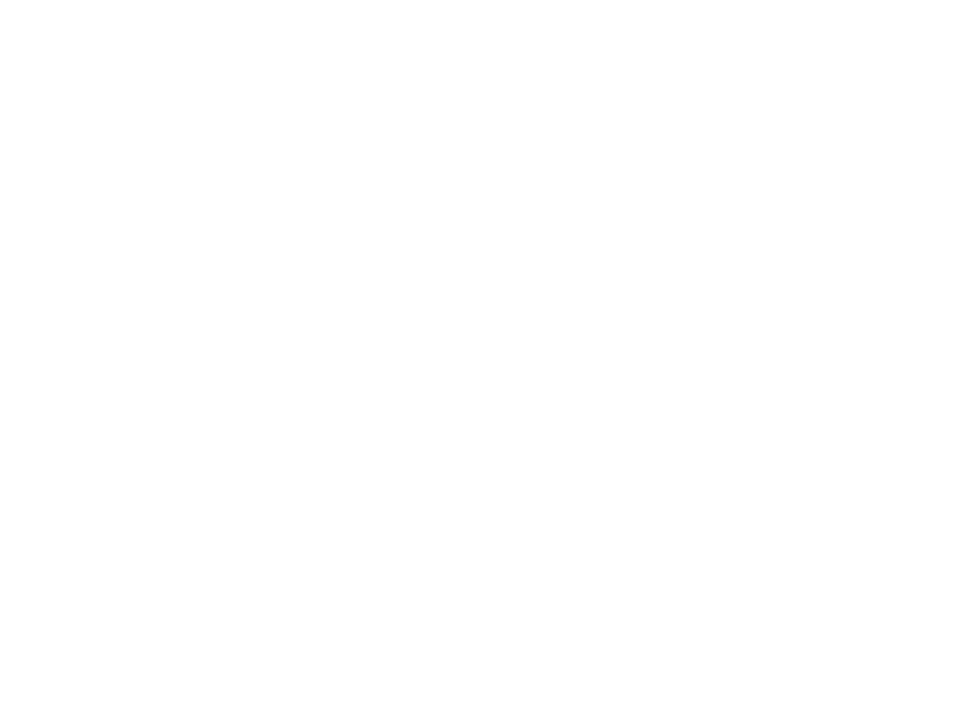

<IPython.core.display.Javascript object>


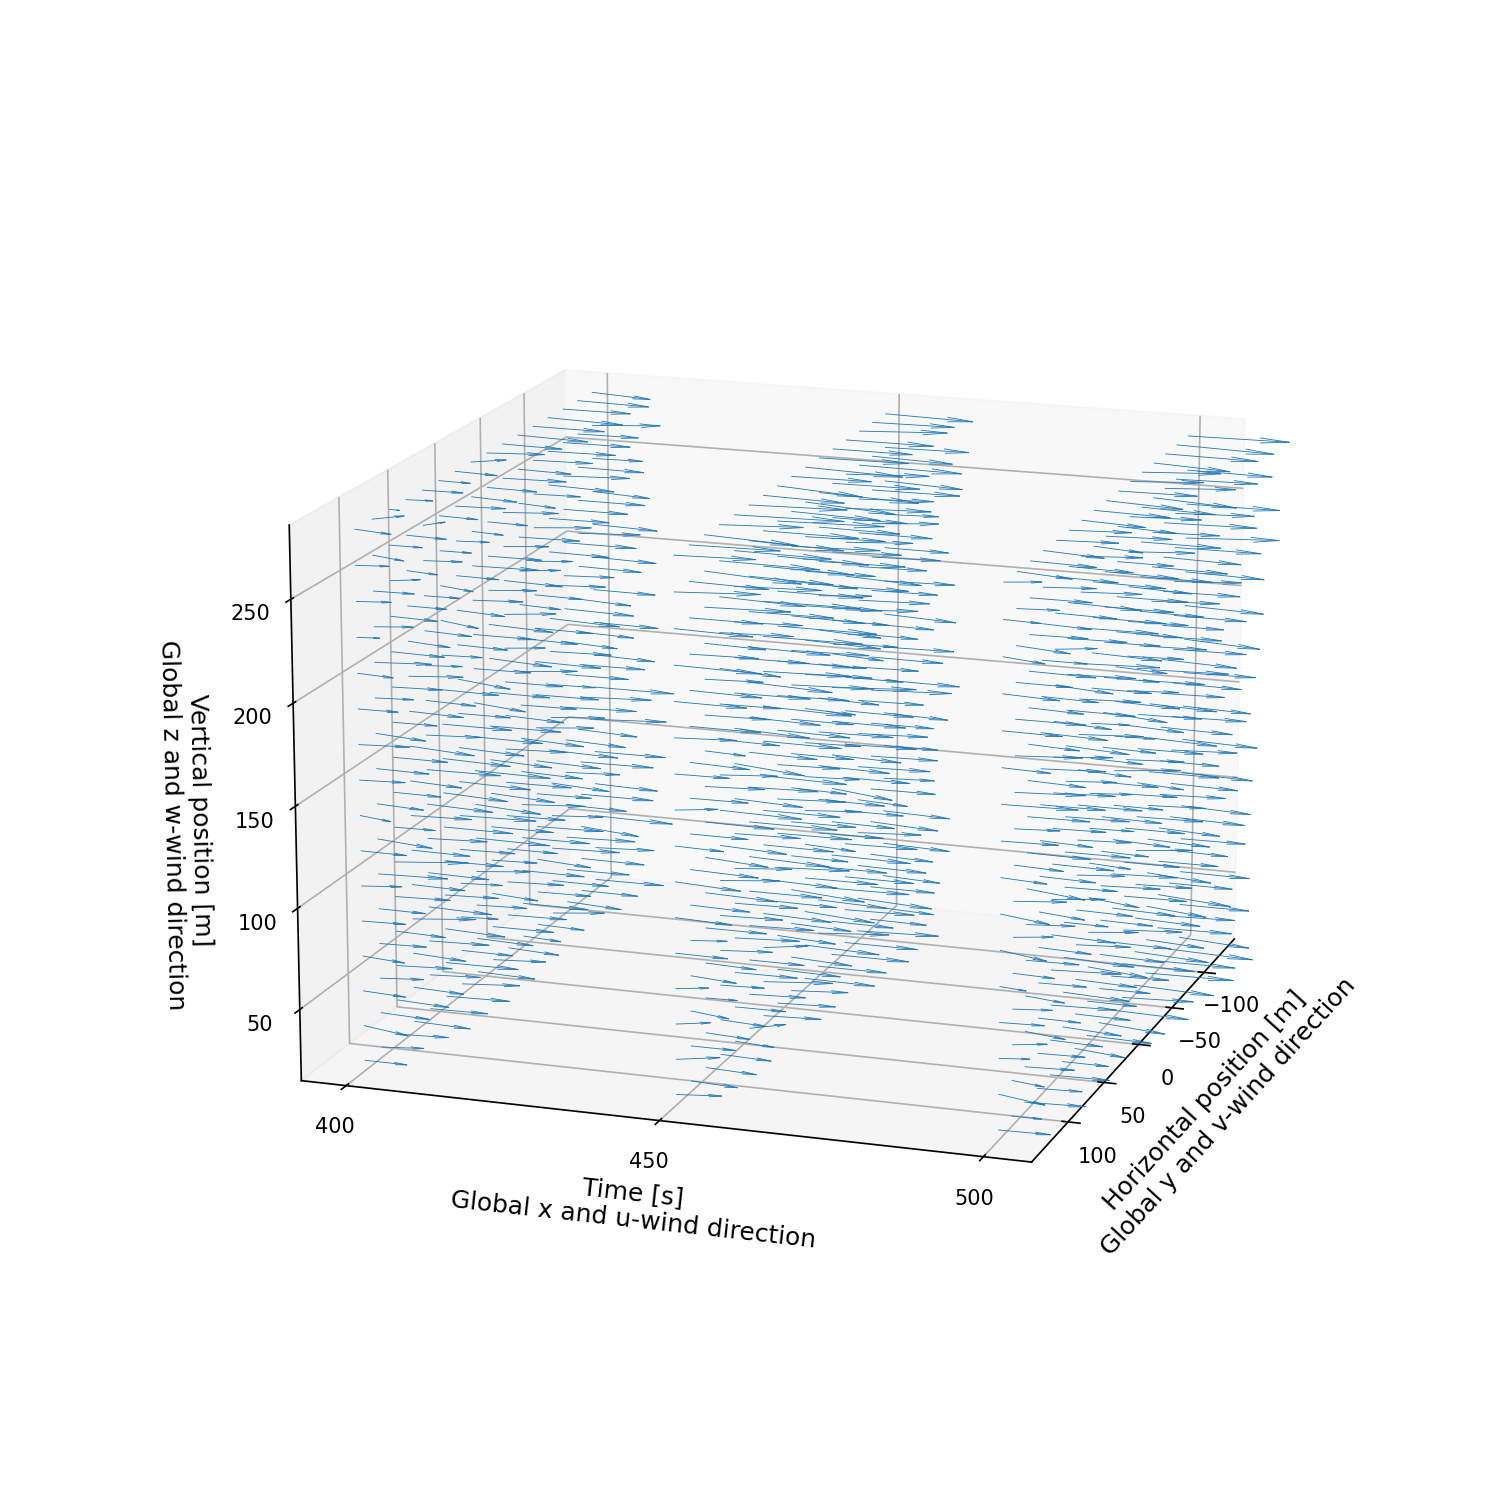

Text(0.5, 0, 'Horizontal position [m]\n Global y and v-wind direction')

Text(0.5, 0, 'Time [s]\n Global x and u-wind direction')

Text(0.5, 0, 'Vertical position [m]\n Global z and w-wind direction')

In [65]:
# 3D quiver plot

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# every n grid points
n_skip = 2


fig = plt.figure()
ax = plt.figure(figsize = (10, 10)).add_subplot(projection='3d')


# Make the grid
x, y, z = np.meshgrid(np.arange(-130, 130, n_skip*26./3.),
                      np.arange(400, 500.00000001, float(50)),
                      np.arange(20, 280, n_skip*26./3.))


# Make the direction data for the arrows
u = np.stack((EveryNGridPoint(u_df_table_1, n_skip).to_numpy(), EveryNGridPoint(u_df_table_2, n_skip).to_numpy(), EveryNGridPoint(u_df_table_3, n_skip).to_numpy()))
v = np.stack((EveryNGridPoint(v_df_table_1, n_skip).to_numpy(), EveryNGridPoint(v_df_table_2, n_skip).to_numpy(), EveryNGridPoint(v_df_table_3, n_skip).to_numpy()))
w = np.stack((EveryNGridPoint(w_df_table_1, n_skip).to_numpy(), EveryNGridPoint(w_df_table_2, n_skip).to_numpy(), EveryNGridPoint(w_df_table_3, n_skip).to_numpy()))



ax.quiver(x, y, z, v, u, w, length=1, normalize=False, linewidth=0.4)

ax.set_xlabel('Horizontal position [m]\n Global y and v-wind direction', fontsize=12, rotation=150, labelpad=10)
ax.set_ylabel('Time [s]\n Global x and u-wind direction', fontsize=12, labelpad=10)
ax.set_zlabel('Vertical position [m]\n Global z and w-wind direction', fontsize=12, rotation=60, labelpad=10)

ax.set_yticks(np.arange(400, 500.00000001, float(50)))

plt.show()

In [27]:
# Subplot of time histories 3 components

folder = r"D:\100 - Project files\01 - Data\01 - Wind" 
os.chdir(folder)
csv_file = 'TH_WindData.csv'
windTH_df = pd.read_csv(csv_file, sep=';')

windTH_df


,Time,Wind X velocity,Wind Y velocity,Wind Z velocity
0,-500.0,0.000000e+00,0.000000e+00,0.000000e+00
1,-499.9,1.150000e-07,8.100000e-09,-1.290000e-11
2,-499.8,9.220000e-07,6.470000e-08,-1.030000e-10
3,-499.7,3.110000e-06,2.180000e-07,-3.480000e-10
4,-499.6,7.350000e-06,5.160000e-07,-8.240000e-10
...,...,...,...,...
10996,599.6,1.128758e+01,8.488823e-02,-1.134242e+00
10997,599.7,1.117102e+01,-1.234056e-02,-6.223409e-01
10998,599.8,1.140284e+01,-4.350482e-01,-7.123790e-01
10999,599.9,1.198165e+01,-3.905418e-01,-4.931688e-01


0       -500.0
1       -499.9
2       -499.8
3       -499.7
4       -499.6
         ...  
10996    599.6
10997    599.7
10998    599.8
10999    599.9
11000    600.0
Name: Time, Length: 11001, dtype: float64

<IPython.core.display.Javascript object>


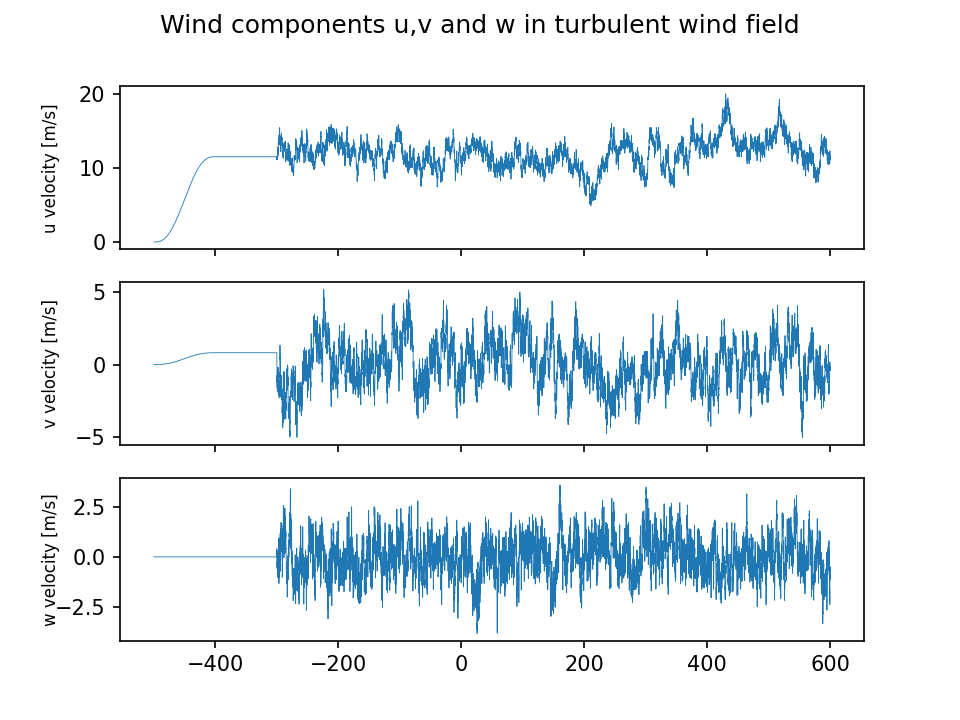

Text(0.5, 0.98, 'Wind components u,v and w in turbulent wind field')

Text(-0.08, 0.5, 'u velocity [m/s]')

Text(-0.08, 0.5, 'v velocity [m/s]')

Text(-0.08, 0.5, 'w velocity [m/s]')

In [50]:
# Create subplot
windTH_df['Time']
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle('Wind components u,v and w in turbulent wind field')
ax1.plot(windTH_df['Time'], windTH_df['Wind X velocity'], linewidth=0.4)
ax2.plot(windTH_df['Time'], windTH_df['Wind Y velocity'], linewidth=0.4)
ax3.plot(windTH_df['Time'], windTH_df['Wind Z velocity'], linewidth=0.4)

labelx = -0.08
ax1.yaxis.set_label_coords(labelx, 0.5)
ax2.yaxis.set_label_coords(labelx, 0.5)
ax3.yaxis.set_label_coords(labelx, 0.5)

ax1.set_ylabel('u velocity [m/s]', fontsize = 8.0)
ax2.set_ylabel('v velocity [m/s]', fontsize = 8.0)
ax3.set_ylabel('w velocity [m/s]', fontsize = 8.0)





plt.show()